<a href="https://colab.research.google.com/github/Suket-Shubhankar/Stock-Market-prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  

 Shape of the data:
(1235, 8)

 Shape of training set:
(987, 2)

 Shape of validation set:
(248, 2)

 RMSE value on validation set:
104.51415465984348


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


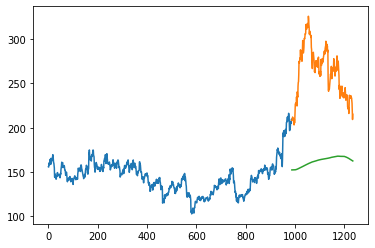

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
print(df.head())
print('\n Shape of the data:')
print(df.shape)
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]
train = new_data[:987]
valid = new_data[987:]
print('\n Shape of training set:')
print(train.shape)
print('\n Shape of validation set:')
print(valid.shape)
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

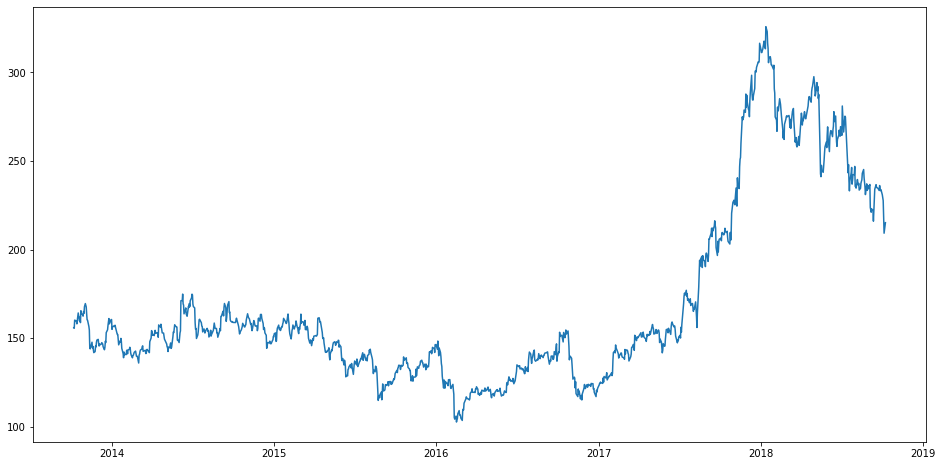

In [ ]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [ ]:
from fastai.tabular import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:64: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df[prefix + 'Elapsed'] = field.astype(np.int64) // 10 ** 9


In [ ]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_valid)

In [ ]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Mean Absolute Error:", mean_absolute_error(y_valid, y_pred))
print("Coefficient of Determination:", r2_score(y_valid, y_pred))

121.16291596522808
Mean Absolute Error: 117.12250366408716
Coefficient of Determination: -17.071699111579367


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


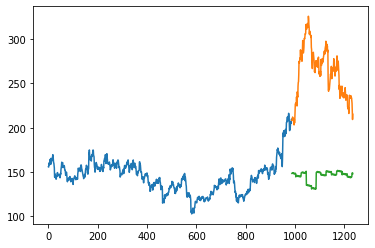

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print(rms)
y_pred = model.predict(x_valid)
print("Mean Absolute Error:", mean_absolute_error(y_valid, y_pred))
print("Coefficient of Determination:", r2_score(y_valid, y_pred))

115.17086550026721
Mean Absolute Error: 107.75310483870966
Coefficient of Determination: -15.328444511303175


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


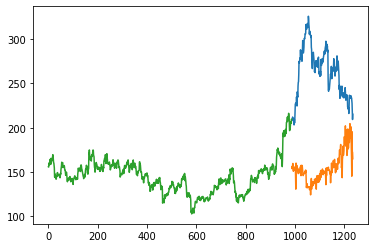

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

In [ ]:
pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.64 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5477.259, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5168.276, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5479.164, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5076.280, Time=1.04 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.97 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.80 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5074.398, Time=0.94 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5166.277, Time=0.43 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=4.96 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.07 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5076.285, Time=1.26 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5077.935, Time=2.45 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5076.3

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
print(rms)
y_pred = forecast
print("Mean Absolute Error:", mean_absolute_error(valid['Close'], y_pred))
print("Coefficient of Determination:", r2_score(valid['Close'], y_pred))

54.54322744872866
Mean Absolute Error: 42.87814938713138
Coefficient of Determination: -2.6621929208581006


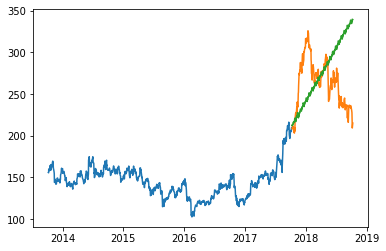

In [ ]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [ ]:
from fbprophet import Prophet

new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

train = new_data[:987]
valid = new_data[987:]

model = Prophet()
model.fit(train)

close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
print(rms)
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation( model = model, horizon = pd.to_timedelta(12))

57.31515213754124


INFO:fbprophet:Making 740 forecasts with cutoffs between 2014-10-08 23:59:59.999999988 and 2017-10-05 23:59:59.999999988


  0%|          | 0/740 [00:00<?, ?it/s]

In [ ]:
print(cv_results)

            ds        yhat  yhat_lower  yhat_upper       y  \
0   2014-10-09  158.750459  154.555547  163.143229  161.25   
1   2014-10-10  160.606188  156.434996  164.973190  160.25   
2   2014-10-13  161.918268  157.489603  166.209812  157.50   
3   2014-10-14  161.467222  157.020530  165.684877  156.40   
4   2014-10-16  161.140202  157.045897  165.253964  152.35   
..         ...         ...         ...         ...     ...   
735 2017-09-29  196.308504  186.881136  206.345951  205.80   
736 2017-10-03  197.315158  187.507138  206.363111  206.45   
737 2017-10-04  198.762373  189.648326  208.307440  204.95   
738 2017-10-05  198.909492  189.896927  208.351816  209.45   
739 2017-10-06  199.990865  191.124017  209.213336  209.60   

                           cutoff  
0   2014-10-08 23:59:59.999999988  
1   2014-10-09 23:59:59.999999988  
2   2014-10-12 23:59:59.999999988  
3   2014-10-13 23:59:59.999999988  
4   2014-10-15 23:59:59.999999988  
..                            ...  
735

In [ ]:
from fbprophet.diagnostics import performance_metrics
dfp = performance_metrics(cv_results)
dfp

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 00:00:00.000000012,89.817165,9.477192,7.646717,0.054135,0.048256,0.510811


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


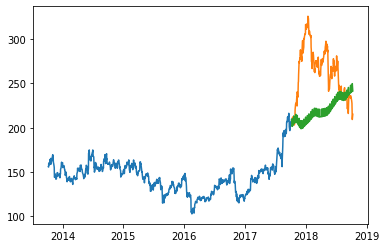

In [ ]:
import matplotlib.pyplot as plt
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
y_test = []
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


927/927 - 32s - loss: 9.8040e-04 - 32s/epoch - 34ms/step


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

17.796042061248045
Mean Absolute Error: 0.0679493294966728
Coefficient of Determination: 0.6101421992052402


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


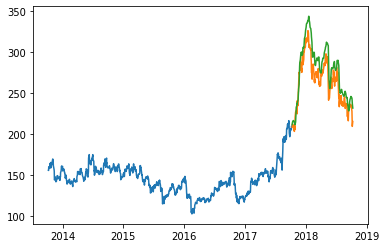

In [ ]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])